In [4]:
#import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6


In [5]:
#read the data
df = pd.read_csv("a2temp.csv", parse_dates=['Year'])
indexedDataset = df.set_index(['Year'])

In [6]:
from datetime import datetime
indexedDataset.head(5)

,Change in temperature
Year,
1990-01-01,0.45
1991-01-01,0.40
1992-01-01,0.25
1993-01-01,0.29
1994-01-01,0.34


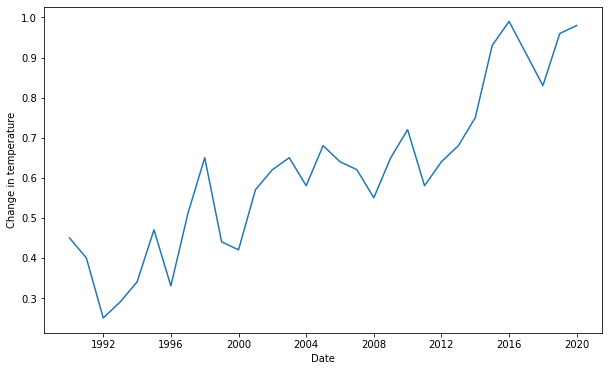

In [7]:
plt.xlabel("Date")
plt.ylabel("Change in temperature")
plt.plot(indexedDataset)

In [8]:
#determining rolling statistics
rolmean = indexedDataset.rolling(window=2).mean()
rolstd = indexedDataset.rolling(window=2).std()
print(rolmean, rolstd)

            Change in temperature
Year                             
1990-01-01                    NaN
1991-01-01                  0.425
1992-01-01                  0.325
1993-01-01                  0.270
1994-01-01                  0.315
1995-01-01                  0.405
1996-01-01                  0.400
1997-01-01                  0.420
1998-01-01                  0.580
1999-01-01                  0.545
2000-01-01                  0.430
2001-01-01                  0.495
2002-01-01                  0.595
2003-01-01                  0.635
2004-01-01                  0.615
2005-01-01                  0.630
2006-01-01                  0.660
2007-01-01                  0.630
2008-01-01                  0.585
2009-01-01                  0.600
2010-01-01                  0.685
2011-01-01                  0.650
2012-01-01                  0.610
2013-01-01                  0.660
2014-01-01                  0.715
2015-01-01                  0.840
2016-01-01                  0.960
2017-01-01    

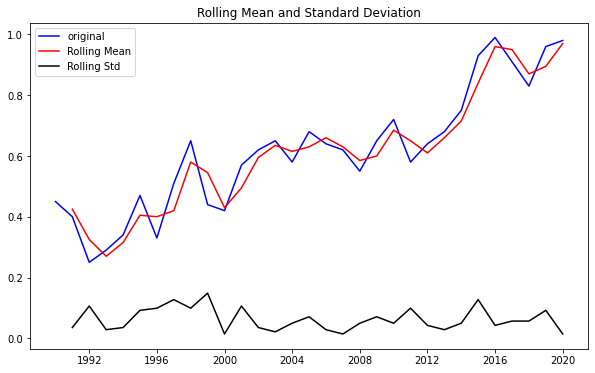

In [9]:
#plot rolling stats
orig = plt.plot(indexedDataset, color='blue', label='original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc="best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

In [10]:
from statsmodels.tsa.stattools import adfuller

print("results of Dickey-Fuller Test:")
dftest = adfuller(indexedDataset['Change in temperature'], autolag="AIC")

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used', 'Number of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

results of Dickey-Fuller Test:
Test Statistic                -0.924096
p-value                        0.779934
#Lags used                     0.000000
Number of Observation Used    30.000000
Critical Value (1%)           -3.669920
Critical Value (5%)           -2.964071
Critical Value (10%)          -2.621171
dtype: float64


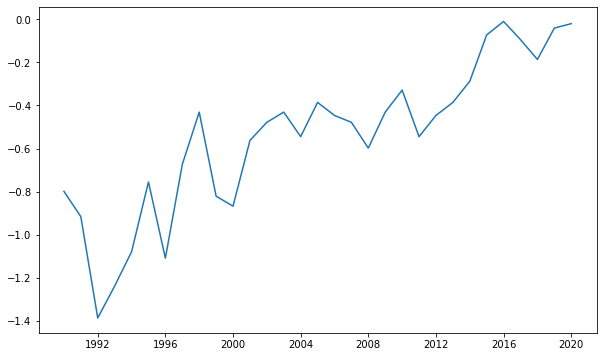

In [11]:
#Estimation of data
indexDataset_logScale = np.log(indexedDataset)
plt.plot(indexDataset_logScale)

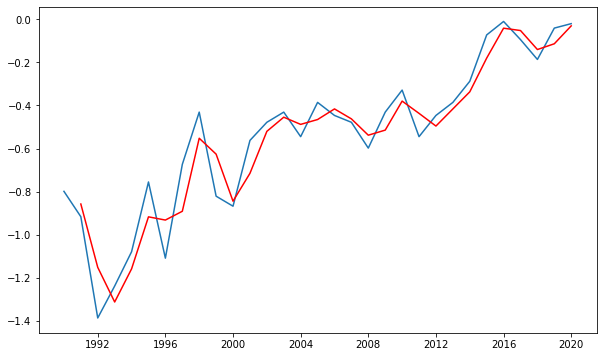

In [12]:
movingAverage = indexDataset_logScale.rolling(window=2).mean()
movingSTD = indexDataset_logScale.rolling(window=2).mean()
plt.plot(indexDataset_logScale)
plt.plot(movingAverage, color='red')

In [13]:
datasetLogScaleMinusMovingAverage = indexDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#removing Nan
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Change in temperature
Year,
1991-01-01,-0.058892
1992-01-01,-0.235002
1993-01-01,0.074210
1994-01-01,0.079532
1995-01-01,0.161894
1996-01-01,-0.176820
1997-01-01,0.217659
1998-01-01,0.121281
1999-01-01,-0.195099


In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #determing rolling stats
    movingAverage = timeseries.rolling(window=2).mean()
    movingSTD = timeseries.rolling(window=2).std()
    
    #plot rolling stats
    orig = plt.plot(timeseries, color='blue', label='original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Dickey-fuller test:
    print('Results of Dickey-Fuller test:')
    dftest = adfuller(timeseries['Change in temperature'], autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used', 'Number of Observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput)

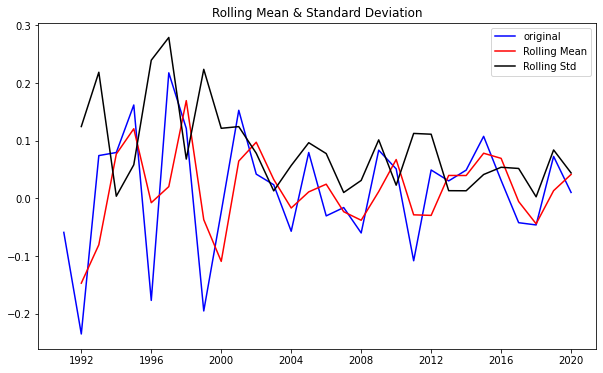

Results of Dickey-Fuller test:
Test Statistic               -7.240280e+00
p-value                       1.892236e-10
#Lags used                    1.000000e+00
Number of Observation Used    2.800000e+01
Critical value (1%)          -3.688926e+00
Critical value (5%)          -2.971989e+00
Critical value (10%)         -2.625296e+00
dtype: float64


In [15]:
test_stationarity(datasetLogScaleMinusMovingAverage)

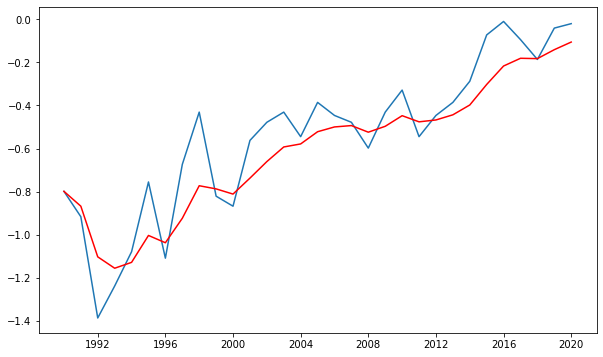

In [16]:
exponentialDecayWeightedAverage = indexDataset_logScale.ewm(halflife=2, min_periods=0, adjust=True).mean()
plt.plot(indexDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

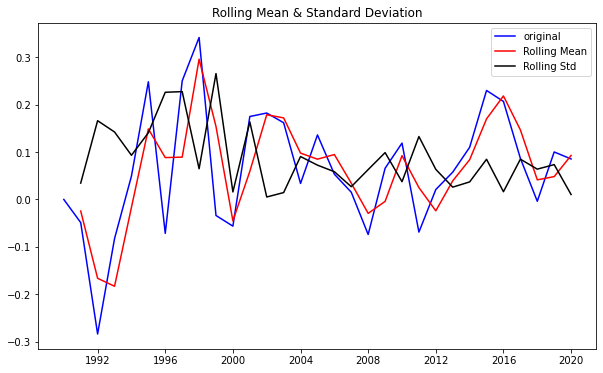

Results of Dickey-Fuller test:
Test Statistic                -3.915649
p-value                        0.001923
#Lags used                     1.000000
Number of Observation Used    29.000000
Critical value (1%)           -3.679060
Critical value (5%)           -2.967882
Critical value (10%)          -2.623158
dtype: float64


In [17]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexDataset_logScale - exponentialDecayWeightedAverage 
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

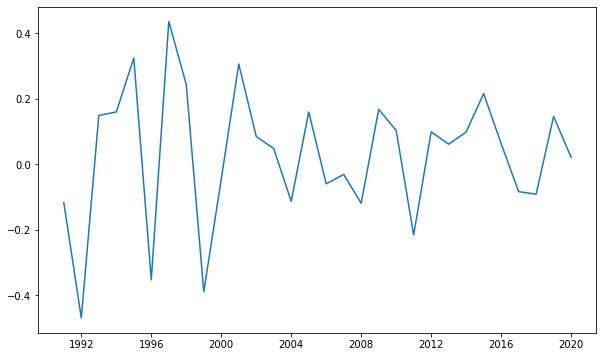

In [18]:
datasetLogDiffShifting = indexDataset_logScale - indexDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

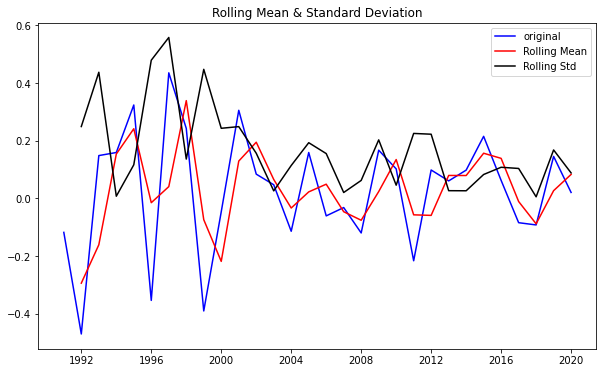

Results of Dickey-Fuller test:
Test Statistic               -7.240280e+00
p-value                       1.892236e-10
#Lags used                    1.000000e+00
Number of Observation Used    2.800000e+01
Critical value (1%)          -3.688926e+00
Critical value (5%)          -2.971989e+00
Critical value (10%)         -2.625296e+00
dtype: float64


In [19]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

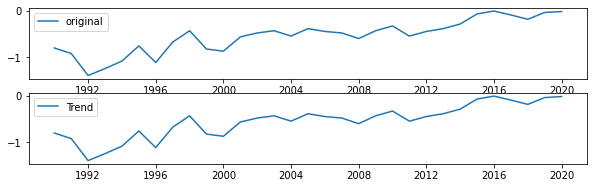

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexDataset_logScale, label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')




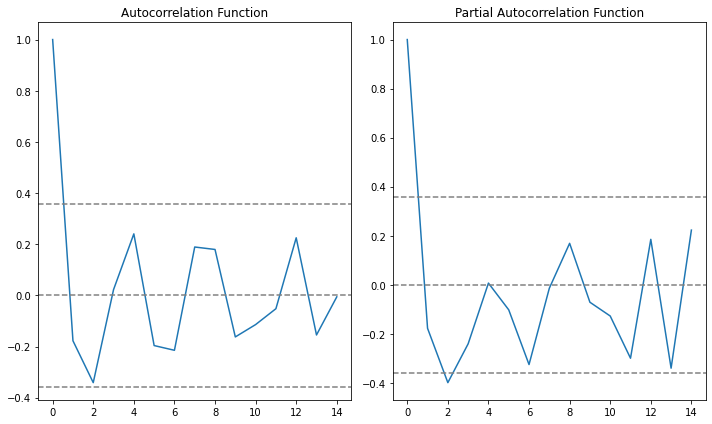

In [21]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=14)
lag_pacf = pacf(datasetLogDiffShifting, nlags=14, method='ols')

#plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [22]:
datasetLogDiffShifting

,Change in temperature
Year,
1991-01-01,-0.117783
1992-01-01,-0.470004
1993-01-01,0.148420
1994-01-01,0.159065
1995-01-01,0.323787
1996-01-01,-0.353640
1997-01-01,0.435318
1998-01-01,0.242562
1999-01-01,-0.390198


In [26]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(datasetLogDiffShifting,order=(1, 1, 1),seasonal_order=(1,1,1,5))
results=model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<AxesSubplot:>

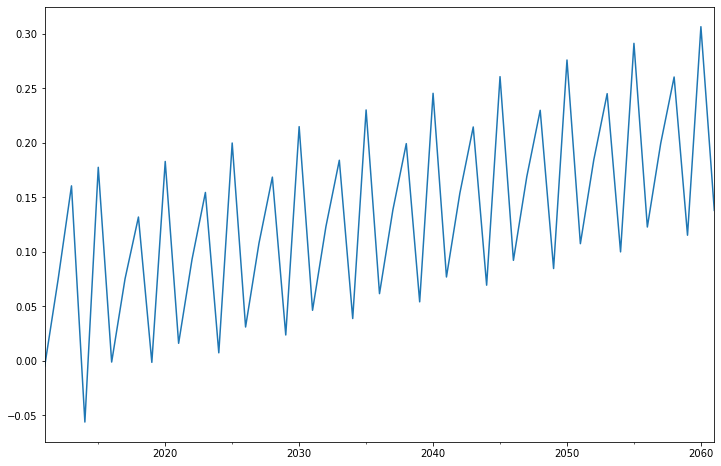

In [25]:
forecast=results.predict(start=20,end=70,dynamic=True)
forecast.plot(figsize=(12,8))


In [ ]:
forecast
